# A Brief Introduction to Matplotlib
### Powered by Pandas!

In this notebook, we will cover the basics of Matplotlib, a powerful, prolific library 
for organizing and visualizing data of all kinds. If you work in science, chances are you'll
find a use case for this.

In [1]:
import matplotlib.pyplot as plt

# This is equivalent: 
#from matplotlib import pyplot as plt

# Make plots appear inline
%matplotlib inline

import pandas as pd
import numpy as np

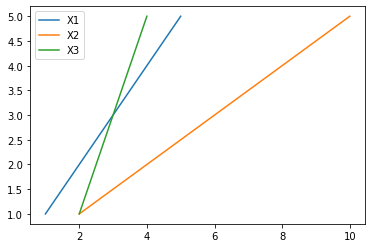

In [9]:
y = [1, 2, 3, 4, 5]

x1 = [1, 2, 3, 4, 5]
x2 = [2, 4, 6, 8, 10]
x3 = [2, 2.5, 3, 3.5, 4]
plt.plot(x1, y, label="X1")
plt.plot(x2, y, label="X2")
plt.plot(x3, y, label="X3")

plt.legend()

<BarContainer object of 5 artists>

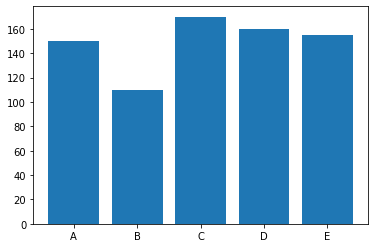

In [12]:
values = [150, 110, 170, 160, 155]
labels = ['A', 'B', 'C', 'D', 'E']
plt.bar(labels, values)

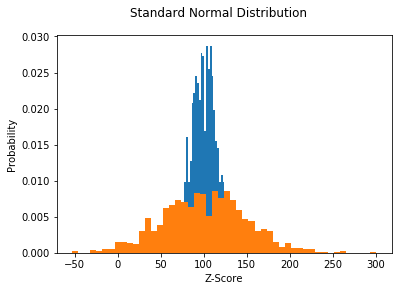

In [13]:
np.random.seed(543210)

bins = 50
size = 1000

# Mean of the distribution
mu = 100

# Standard deviation of the distribution
sigma1 = 15
sigma2 = 50

norm_data = np.random.randn(size)
x1 = mu + sigma1 * norm_data
x2 = mu + sigma2 * norm_data

# example data
plt.hist(x1, bins=bins, density=1, label="")
plt.hist(x2, bins=bins, density=1)

plt.ylabel("Probability")
plt.xlabel("Z-Score")
plt.suptitle("Standard Normal Distribution")
plt.show()

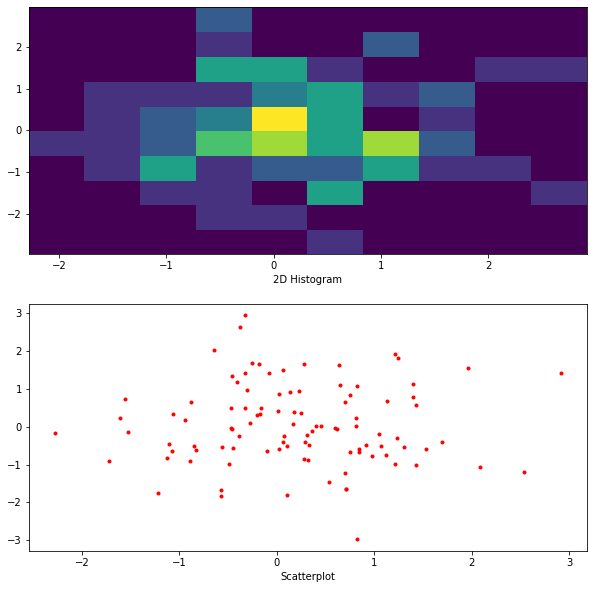

In [27]:
# fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

size = 100 
norm_data = np.random.randn(2, size)

axs[0].hist2d(norm_data[0], norm_data[1])
axs[1].scatter(norm_data[0], norm_data[1], marker=".", color="red")

axs[0].set_xlabel("2D Histogram")
axs[1].set_xlabel("Scatterplot")

plt.show()

In [22]:
# Import the data
em_filepath = './data/emission_data.csv'
# Set the index to the country names
em_data = pd.read_csv(em_filepath, index_col=0)

em_data.head()
em_data.info()
em_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, Afghanistan to Zimbabwe
Columns: 267 entries, 1751 to 2017
dtypes: float64(98), int64(169)
memory usage: 483.7+ KB


,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,...,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,1.214354e+05,2.429184e+05,3.644015e+05,4.859321e+05,6.075102e+05,7.374633e+05,8.674639e+05,9.975121e+05,1.127608e+06,1.257704e+06,...,1.398744e+10,1.431951e+10,1.469829e+10,1.504459e+10,1.543729e+10,1.578588e+10,1.617543e+10,1.653158e+10,1.691931e+10,1.732373e+10
std,1.060948e+06,2.122313e+06,3.183677e+06,4.245457e+06,5.307652e+06,6.443017e+06,7.578797e+06,8.714993e+06,9.851605e+06,1.098822e+07,...,8.981685e+10,9.188034e+10,9.454156e+10,9.661454e+10,9.929591e+10,1.013842e+11,1.040596e+11,1.061600e+11,1.088358e+11,1.115423e+11
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.493352e+07,2.574326e+07,2.644592e+07,2.710177e+07,2.768984e+07,2.862802e+07,2.976871e+07,3.105887e+07,3.268508e+07,3.421887e+07
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.045568e+08,2.129394e+08,2.209573e+08,2.300825e+08,2.416023e+08,2.507415e+08,2.563229e+08,2.621147e+08,2.680755e+08,2.737319e+08
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.394520e+09,2.449266e+09,2.506229e+09,2.563067e+09,2.620797e+09,2.677380e+09,2.713781e+09,2.776195e+09,2.855434e+09,2.987929e+09
max,9.350528e+06,1.870472e+07,2.805891e+07,3.741677e+07,4.677829e+07,5.678467e+07,6.679472e+07,7.680843e+07,8.682581e+07,9.684318e+07,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12


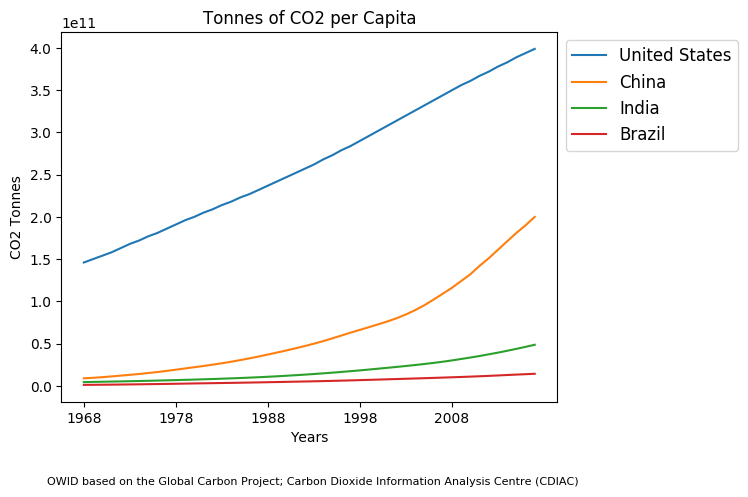

In [41]:
# Get set of years
set_years = em_data.columns[-50:]
# Select those years from dataframe
em_data_set = em_data.filter(items=set_years)

# Get country data
# United States
us_em = em_data_set.loc["United States"]

# China
china_em = em_data_set.loc["China"]

# India
india_em = em_data_set.loc["India"]

# Brazil
brazil_em = em_data_set.loc["Brazil"]

ax = plt.subplot()

ax.plot(us_em, label="United States")
ax.plot(china_em, label="China")
ax.plot(india_em, label="India")
ax.plot(brazil_em, label="Brazil")


# countries = ["United States", "China", "India", "Brazil"]
# for country in countries:
#     country_em = em_data_recent.loc[country]
#     plt.plot(country_em, label=country)

if (len(set_years) > 10):
    set_years_num = [int(year) for year in set_years]
    set_years_limited = np.arange(min(set_years_num), max(set_years_num), 10)
    set_years_limited_string = [str(year) for year in set_years_limited]
    ax.set_xticks(set_years_limited_string)

# Add a legend
ax.legend(bbox_to_anchor=(1, 1), prop={'size': 12})

# Add axis information
ax.set_xlabel('Years')
ax.set_ylabel('CO2 Tonnes')
ax.set_title('Tonnes of CO2 per Capita')
ax.annotate('OWID based on the Global Carbon Project; Carbon Dioxide Information Analysis Centre (CDIAC)', (0,0), (-10,-60), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points')

# plt.style.use('fivethirtyeight')

# plt.tight_layout()

filepath = './out/co2_per_capita.'
plt.savefig(filepath + 'png')
plt.savefig(filepath + 'jpg')
plt.savefig(filepath + 'svg')

plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


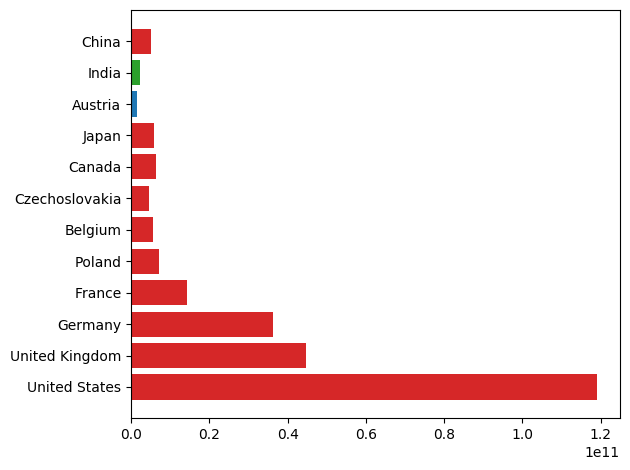

In [43]:
def top_bar_by_year(data, years, num_countries=5, drop_rows = None, ext='.png'):
    '''
    Generates image of top n countries
    '''
    for year in years:
        plt.tight_layout()
        ax = plt.subplot(year)
        data_by_year = data[year].sort_values(ascending=False)
        if drop_rows:
            # Drop region data
            data_by_year = data_by_year.drop(drop_rows)            

        top_emitters = data_by_year.head(num_countries)
        # Get bar plot values
        country_values = top_emitters.values
        # Get bar plot labels
        country_names = top_emitters.index.to_list()
    
        ax.barh(country_names, country_values)
        
        prefix = './out/'
        filename = 'top_emitters_' + year
        filepath = prefix + filename + ext
        plt.savefig(filepath)

years = ['1930', '1940', '1950', '1960']
drop_rows = ['World', 'EU-28', 'Asia and Pacific (other)', 'Europe (other)', 
             'Americas (other)', 'Middle East', 'Africa']
num_countries = 10
top_bar_by_year(em_data, years, num_countries, drop_rows)




In [ ]:
# Alternative
top_emitters.plot(kind='barh')

{'whiskers': [<matplotlib.lines.Line2D at 0x121630410>,
 'caps': [<matplotlib.lines.Line2D at 0x121630ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x121627710>],
 'medians': [<matplotlib.lines.Line2D at 0x121637950>],
 'fliers': [<matplotlib.lines.Line2D at 0x121637e50>],
 'means': []}

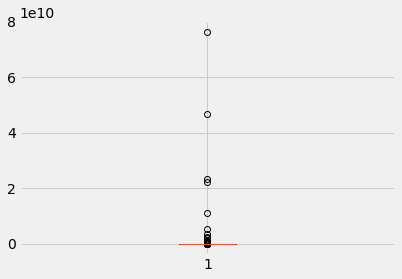

In [82]:
em_data['all_time'] = em_data.mean(axis=1)
# plt.boxplot(em_data[''])

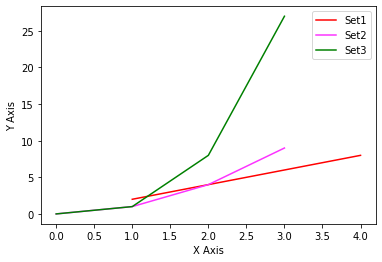

In [267]:
x1 = [1, 2, 3, 4]
y1 = [2, 4, 6, 8]
plt.plot(x1, y1, label="Set1", color="red")

x2 = np.arange(4)
y2 = x2 ** 2
plt.plot(x2, y2, label="Set2", color="#FC33FF")

x3 = np.arange(4)
y3 = x3 ** 3
plt.plot(x3, y3, label="Set3", color="green")



# Add legend
plt.legend()



plt.show()

To start, let's make a line chart that visualizes the top five CO2-emitting nations (per capita) over a 10-year period.

In [268]:
# Import the data
em_filepath = './data/co-emissions-per-capita.csv'
em_data = pd.read_csv(em_filepath)

,Entity,Code,Year,Per capita CO₂ emissions (tonnes per capita)
0,Afghanistan,AFG,1800,0.000000
1,Afghanistan,AFG,1801,0.000000
2,Afghanistan,AFG,1802,0.000000
3,Afghanistan,AFG,1803,0.000000
4,Afghanistan,AFG,1804,0.000000
...,...,...,...,...
42839,Zimbabwe,ZWE,2013,0.766298
42840,Zimbabwe,ZWE,2014,0.769958
42841,Zimbabwe,ZWE,2015,0.691341
42842,Zimbabwe,ZWE,2016,0.615011


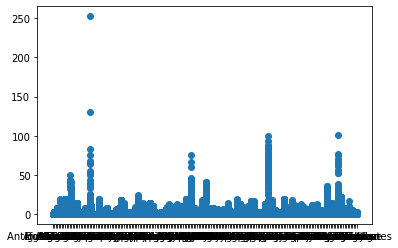

In [269]:
plt.plot('Entity', 'Per capita CO₂ emissions (tonnes per capita)', data=em_data, linestyle='none', marker='o')

Text(-10, -60, 'OWID based on the Global Carbon Project; Carbon Dioxide Information Analysis Centre (CDIAC)')

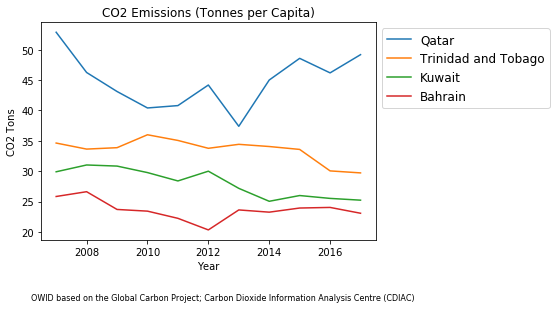

In [215]:


# Find the top emitters of the last 10 years
# Filter the data to include only the last 10 years
last_decade = em_data.Year > 2006
em_data_last_decade = em_data[last_decade]
em_data_by_country = em_data_last_decade.groupby('Entity')
em_data_descending = em_data_by_country.mean().sort_values('Per capita CO₂ emissions (tonnes per capita)', ascending=False)
# top_five_emitters = em_data_rescent_desc = 
top_emitters = em_data_descending.head(4)
top_emitters_list = top_emitters.index.to_list()
 
# qatar_em = em_data_recent_by_country['Qatar']
# print(em_data_recent_by_country)

for emitters in top_emitters_list:
    query = em_data['Entity'] == top_emitter
    data = em_data[query & last_decade]
    years = data['Year'].unique()
    emissions = data[['Per capita CO₂ emissions (tonnes per capita)']]
    plt.plot(years, emissions, label=top_emitter)
    
    
# Add labels
plt.xlabel('Year')
plt.ylabel('CO2 Tons')
plt.title('CO2 Emissions (Tonnes per Capita)')




# 
plt.annotate('OWID based on the Global Carbon Project; Carbon Dioxide Information Analysis Centre (CDIAC)', (0,0), (-10,-60), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points')


In [129]:
# Import the data
em_filepath = './data/co-emissions_per_capita.csv'
# Set the index to the country names
em_data = pd.read_csv(em_filepath, index_col=0)



# Years covered by the data
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

# Emissions data for USA
us_emissions = [19.7, 19.6, 19.1, 19.3, 18.5, 17.2, 17.5, 17, 16.3, 16.4, 16.5]
[20.39614762,
19.55597372,
17.95432657,
18.47152059,
17.90928137,
17.12774837,
17.49277652,
17.52732173,
16.94376372,
16.48416388,
16.24094876
plt.plot(years, us_emissions, label='USA')

# Emissions data for UK
uk_emissions = [9, 9, 8.91, 8.6, 8.39, 7.52, 7.79, 7.02, 7.29, 7.09, 6.46]
plt.plot(years, uk_emissions, label='UK')

# Emissions data for India
india_emissions = [1.03, 1.07, 1.12, 1.19, 1.31, 1.43, 1.4, 1.48, 1.6, 1.59, 1.73]
plt.plot(years, india_emissions, marker="o", label='India')

# Emissions data for China
china_emissions = [3.98, 4.46, 4.91, 5.26, 5.62, 5.92, 6.45, 7.12, 7.29, 7.42, 7.4]
plt.plot(years, china_emissions, label='China')

# Add style to the x ticks
plt.xticks(ticks=years, labels=years, rotation=45)

# Change scaling for y axis
plt.axis([2004, 2014, 0, 30])

# Add labels
plt.xlabel('Year')
plt.ylabel('CO2 Tons')
plt.title('CO2 Emissions (Tons per Person)')

# Add a legend
# plt.legend(bbox_to_anchor=(1, 1), prop={'size': 12})

# Ensure a tight, uncluttered layout
# plt.tight_layout()


# Annotate with source
# Placement of annotation is fraction of the axes coordinate system
# Placement of text is an offset in points
# plt.annotate('CDIAC: https://cdiac.ess-dive.lbl.gov/', (0,0), (-10,-60), fontsize=8, 
#              xycoords='axes fraction', textcoords='offset points')

# Set the plot style
# plt.style.use('fivethirtyeight')

# Save the figure
# plt.savefig('./out/co2_plot1.png')
# plt.savefig('./out/co2_plot2.jpg')
# plt.savefig('./out/co2_plot3.svg')


# Show the figure
plt.show()

FileNotFoundError: [Errno 2] File b'./data/co-emissions_per_capita.csv' does not exist: b'./data/co-emissions_per_capita.csv'

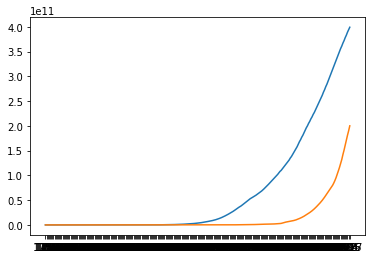

In [124]:
# Import the data
em_filepath = './data/emission_data.csv'
# Set the index to the country names
em_data = pd.read_csv(em_filepath, index_col=0)

em_data.head()
em_data.describe()

# Get world emissions data
world_em = em_data.loc["World"]
us_em = em_data.loc["United States"]
china_em = em_data.loc["China"]

# world_em.plot()
# us_em.plot()
# china_em.plot()
# plt.title("hello")

plt.plot(us_em)
# kind — ‘bar’,’barh’,’pie’,’scatter’,’kde’ etc which can be found in the docs.
# color — Which accepts and array of hex codes corresponding sequential to each data series / column.
# linestyle — ‘solid’, ‘dotted’, ‘dashed’ (applies to line graphs only)
# xlim, ylim — specify a tuple (lower limit, upper limit) for which the plot will be drawn
# legend— a boolean value to display or hide the legend
# labels — a list corresponding to the number of columns in the dataframe, a descriptive name can be provided here for the legend
# title — The string title of the plot




# plt.plot(china_em)

# plt.set_ticks()






# world_em.plot(kind="pie")

# fig.suptitle('This is a somewhat long figure title', fontsize=16)


# ax = world_em.plot(kind="line")
# ax.set_color="green"
# plt.show()

Great! We've got our first plot. Let's keep working with this data and see if we can   
rank the top producers emitters of CO2, using a bar chart. But let's not write in our   
data by hand. Let's download a file from a URL and work with it locally.

First, let's import the requests package (another ).

In [ ]:
import requests

In [57]:
# URL of data
url = 'https://raw.githubusercontent.com/andymbryant/matplotlib-demo/master/co2_emissions_per_capita.csv'

# Make a request, allowing for redirects
r = requests.get(url, allow_redirects=True)

# open the file in 'write binary' mode
# this file does not exist, so it will be created
file = open('co2_emissions_per_capita.csv', 'wb')

# write the content from the request object to that file
file.write(r.content)

# be sure to close the file!
file.close()

Good! We've got the file. Now we need to work with it. Let's use vanilla python to start.  
Because this is a csv document, we'll need the csv package. 

In [6]:
import csv

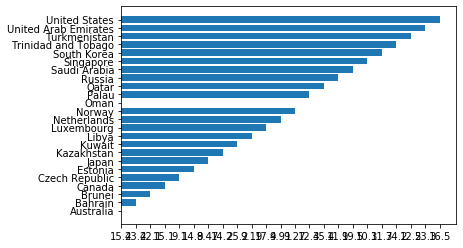

In [9]:
# Initialize our lists
countries = []
emission_levels = []

# Open file and read it using the csv package
with open('co2_emissions_per_capita.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
  
    # Loop through the rows
    # If emissions values for 2014 are greater than 9, append them to the lists
    for row in csv_reader:
        if float(row['2014']) > 9:
            countries.append(row['country'])
            emission_levels.append(row['2014'])

# Plot the data using a bar graph
plt.barh(countries, emission_levels)

# Show the plot
plt.show()

Hmmm... something's not right. This plot might work in the short-term, but when we try and improve it, it falls apart pretty quickly. Pandas to the rescue!  

Pandas is an open-source Python library. It has a number of high-performance, easy-to-use data structures, specifically designed for data analysis. Let's take a look.

In [11]:
import pandas as pd

In [53]:
df1 = pd.DataFrame(
    [['Jan',58,42,74,22,2.95],
     ['Feb',61,45,78,26,3.02],
     ['Mar',65,48,84,25,2.34],
     ['Apr',67,50,92,28,1.02],
     ['May',71,53,98,35,0.48],
     ['Jun',75,56,107,41,0.11],
     ['Jul',77,58,105,44,0.0],
     ['Aug',77,59,102,43,0.03],
     ['Sep',77,57,103,40,0.17],
     ['Oct',73,54,96,34,0.81],
     ['Nov',64,48,84,30,1.7],
     ['Dec',58,42,73,21,2.56]],
    columns = ['month','avg_high','avg_low','record_high','record_low','avg_precipitation'])

df1.head()

df1.tail()

df1.min()
df['record_low'].max()

df.sample(n=4)

df2 = pd.DataFrame(
    [['Jan',65,40,80,22,3.1],
     ['Feb',65,45,41,29,3.09],
     ['Mar',61,48,98,35,2.84],
     ['Apr',60,54,91,38,1.84],
     ['May',74,43,90,45,0.9],
     ['Jun',77,55,101,51,0.19],
     ['Jul',78,54,100,52,0.2],
     ['Aug',74,52,109,49,0.45],
     ['Sep',72,52,101,42,0.87],
     ['Oct',77,59,91,44,0.32],
     ['Nov',66,51,80,65,1.8],
     ['Dec',52,40,74,25,2.9]],
    columns = ['month','avg_high','avg_low','record_high','record_low','avg_precipitation'])

df1.gt(df2)

44

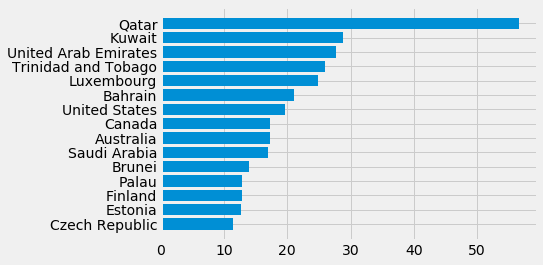

In [54]:
# Declare the year
year = '2004'

# Read in the data, using pandas
dataframe = pd.read_csv('co2_emissions_per_capita.csv')

# Filter the data
dataframe = dataframe.nlargest(15, year).sort_values(year)

# Plot the data, using dataframes
plt.barh(dataframe['country'], dataframe[year])

# Show the plot
plt.show()

In [59]:
# URL of data
url = 'https://raw.githubusercontent.com/andymbryant/matplotlib-demo/master/co2_emissions_by_year.csv'

# Make a request, allowing for redirects
r = requests.get(url, allow_redirects=True)

# open the file in 'write binary' mode
# this file does not exist, so it will be created
file = open('co2_emissions_by_year.csv', 'wb')

# write the content from the request object to that file
file.write(r.content)

# be sure to close the file!
file.close()

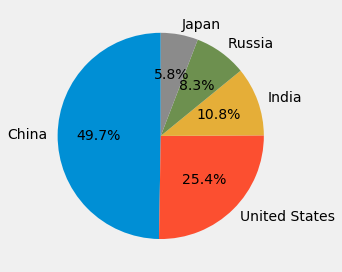

In [55]:
# Declare the year
year = '2014'

# Read in the data, using pandas
df = pd.read_csv('co2_emissions_by_year.csv')

# Filter the data
df = df.nlargest(5, year)

# Plot the data with a pie chart
# No shadow, string formatting as percentage
plt.pie(df[year], labels=df['country'], shadow=False, startangle=90, autopct='%1.1f%%')

# Ensure tight layout
plt.tight_layout()

# Show the plot
plt.show()

Looking good! Now for a bonus: let's play around with NumPy and figures in Matplotlib.

In [57]:
import numpy as np

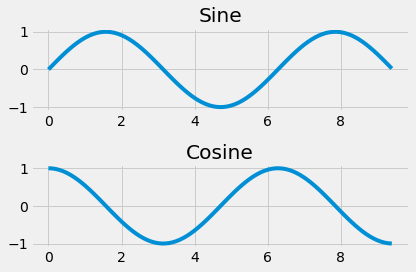

In [61]:
# Compute the x and y coordinates for points on sine and cosine curves 
x = np.arange(0, 3 * np.pi, 0.1) 
y_sin = np.sin(x) 
y_cos = np.cos(x)  
   
# Set up a subplot grid that has height 2 and width 1, 
# and set the first such subplot as active. 
plt.subplot(2, 1, 1)
   
# Make the first plot 
plt.plot(x, y_sin) 
plt.title('Sine')  
   
# Set the second subplot as active, and make the second plot. 
plt.subplot(2, 1, 2) 
plt.plot(x, y_cos) 
plt.title('Cosine')  

# Ensure tight layout
plt.tight_layout()
   
# Show the figure. 
plt.show()

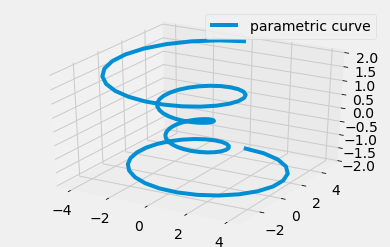

In [9]:
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

In [10]:
# boxplot - is our data symmetrical? How tightly is it grouped? What outliers do we have, if any? Is our data skewed?

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

{'whiskers': [<matplotlib.lines.Line2D at 0x116384e90>,
 'caps': [<matplotlib.lines.Line2D at 0x1164194d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x116384e50>],
 'medians': [<matplotlib.lines.Line2D at 0x116419f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x116378fd0>],
 'means': []}

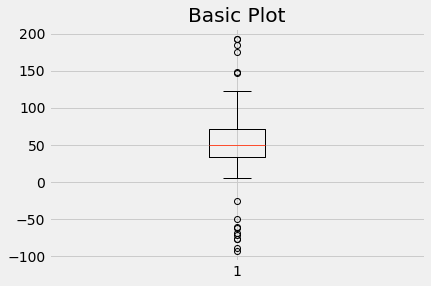

In [11]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps